In [30]:
import pandas as pd
import numpy as np

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id_number', 'diagnosis', 'radius_mean', 
              'texture_mean', 'perimeter_mean', 'area_mean', 
              'smoothness_mean', 'compactness_mean', 
              'concavity_mean','concave_points_mean', 
              'symmetry_mean', 'fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 
              'area_se', 'smoothness_se', 'compactness_se', 
              'concavity_se', 'concave_points_se', 
              'symmetry_se', 'fractal_dimension_se', 
              'radius_worst', 'texture_worst', 
              'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 
              'concavity_worst', 'concave_points_worst', 
              'symmetry_worst', 'fractal_dimension_worst'] 
#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 30)
#속성 변수 선택

# feature_selection = ['radius_se','compactness_se','fractal_dimension_mean','texture_worst','concavity_worst']

# X=df.loc[:,feature_selection]
X=df.iloc[:,2:]
y=df['diagnosis']

feature_selection = df.iloc[:,2:]

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (398, 30)
test data 개수:  (171, 30)




In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=2000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
model_rf.fit(X_train, y_train)
y_hat = model_rf.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

print("%.4f" % model_rf.oob_score_)
print("%.5f" %model_rf.oob_score_)

['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M']
['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M']
0.9497
0.94975


In [32]:
# model 성능확인
from sklearn import metrics as mt

y_hat_t=model_rf.predict(X_train)

t_acc = mt.accuracy_score(y_train, y_hat_t)
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("train accuracy", t_acc)
print("accuracy", acc )
print("confusion matrix\n",conf)

# 모형 성능 평가 - 평가지표 계산
report_rf = mt.classification_report(y_test, y_hat)            
print(report_rf)

train accuracy 0.9899497487437185
accuracy 0.9824561403508771
confusion matrix
 [[109   3]
 [  0  59]]
              precision    recall  f1-score   support

           B       1.00      0.97      0.99       112
           M       0.95      1.00      0.98        59

    accuracy                           0.98       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



                   variable  importance
22          perimeter_worst    0.140175
27     concave_points_worst    0.123035
23               area_worst    0.118617
20             radius_worst    0.099097
7       concave_points_mean    0.088559
3                 area_mean    0.048080
6            concavity_mean    0.047754
26          concavity_worst    0.045850
0               radius_mean    0.045568
2            perimeter_mean    0.043450
13                  area_se    0.028837
21            texture_worst    0.023772
1              texture_mean    0.018348
24         smoothness_worst    0.016131
25        compactness_worst    0.016130
12             perimeter_se    0.013876
10                radius_se    0.012018
5          compactness_mean    0.009876
28           symmetry_worst    0.009787
29  fractal_dimension_worst    0.007746


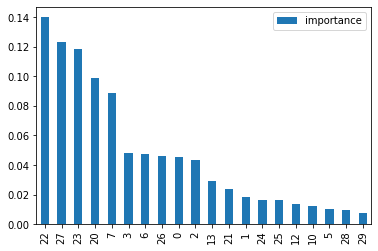

In [33]:
# variable importance
import matplotlib.pyplot as plt

a= pd.concat((pd.DataFrame(df.iloc[:,2:].columns, columns = ['variable']), 
           pd.DataFrame(model_rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

print(pd.concat((pd.DataFrame(df.iloc[:,2:].columns, columns = ['variable']), 
           pd.DataFrame(model_rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]
     )
a.plot(kind='bar')
plt.show()
# model_rf.feature_importances_

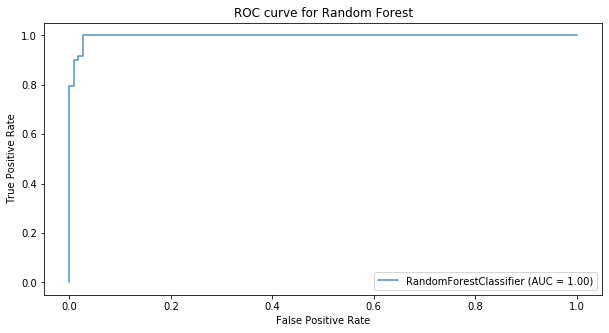

In [34]:
# roc curve
from sklearn.metrics import plot_roc_curve

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_title("ROC curve for Random Forest")
# ax.set_xlabel("False positive rate")
# ax.set_ylabel("True positive rate")

rf_disp = plot_roc_curve(model_rf,X_test, y_test,ax=ax, alpha=0.8)
plt.show()


Test_score:  0.9649122807017544


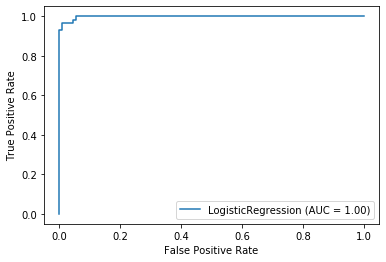

In [35]:
# model.fit
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)
logit_disp = plot_roc_curve(model_logit, X_test, y_test)
print('Test_score: ', model_logit.score(X_test, y_test))

Test_score:  0.9824561403508771


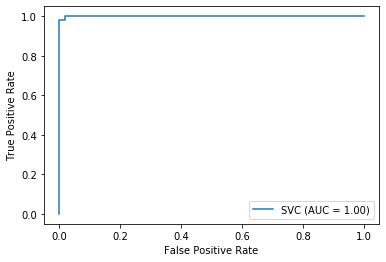

In [38]:
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train) 
svm_disp=plot_roc_curve(svm_model, X_test, y_test)
print('Test_score: ', svm_model.score(X_test, y_test))

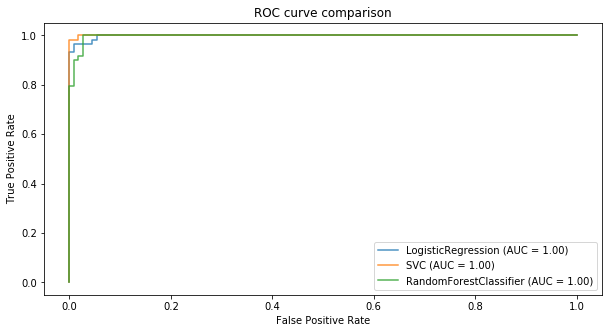

In [40]:
# roc curve
from sklearn.metrics import plot_roc_curve

fig = plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title("ROC curve comparison")
logit_disp.plot(ax=ax,alpha=0.8)
svm_disp.plot(ax=ax,alpha=0.8)

rf_disp = plot_roc_curve(model_rf,X_test, y_test,ax=ax, alpha=0.8)
plt.show()